In [45]:
import cv2 as cv
import collections as col
import os.path
from typing import List
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [27]:



def load_images_from_folder(images_FP7):
    images = []
    list_lw = []
    for bild in os.listdir(images_FP7):
    
        #print(bild)
        name = bild.split('_')
        lw_in_name = name[3].split('.')
        lenkwinkel = int(lw_in_name[0])
        # print(name)
        # print(lenkwinkel)
        img = cv.imread(os.path.join(images_FP7,bild))
        #image_lw = [img, lenkwinkel]
        if img is not None:
            images.append(img)
            list_lw.append(lenkwinkel)
            
    return images, list_lw

    #Lenkwinkel_Dict:
    #path_dir: str = r"/home/imm-81/c2c/camp2code-project_phase_2/Code/images_FP7"

    #content_dir: List[str] = os.listdir(path_dir)
#df = pd.DataFrame
X, y = load_images_from_folder('images_FP7')
X = np.array(X)
y = np.array(y).astype('float')
print(X.shape)
print(y.shape)

# Bild_list_array = load_images_from_folder('images_FP7')
# print(len(Bild_list_array))
# bild_act = Bild_list_array[0]
# print(bild_act[1])
# print(len(bild_act[0]))
# print(bild_act[0].shape)
# cv.imshow('test', bild_act[0])
# cv.waitKey(0)
# cv.destroyAllWindows()





(157, 242, 594, 3)
(157,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# print(X_train)

In [29]:
# Keras Sequntial API

from tensorflow.keras.layers import Conv2D, Dropout, Flatten
model = tf.keras.Sequential(name='Team_Israel')
# Convolution Layers
# elu: Expenential Linear Unit, similar to leaky Relu
model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(242, 594, 3), activation='elu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(Dropout(0.2)) # more robustness
model.add(Conv2D(64, (3, 3), activation='elu'))
# Fully Connected Layers
model.add(Flatten())
model.add(Dropout(0.2)) # more robustness
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
# Output Layer: turning angle
model.add(Dense(1)) 

In [30]:
model.summary()

Model: "Team_Israel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 119, 295, 24)      1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 146, 36)       21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 71, 48)        43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 69, 64)        27712     
                                                                 
 dropout_2 (Dropout)         (None, 25, 69, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 67, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 98624)             

In [35]:
# Kompilierung des Modells. Ein nicht kompiliertes Modell kann nicht trainiert werden!
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.05), # Festlegen eines Opimizers und der Schrittweite
    loss='mse')

In [36]:
# Durchführung des Trainings mittels der Methode fit am kompilierten Modell.
# Die Methode gibt ein Objekt zurück, welches den Trainingsverlauf dokumentiert.
history = model.fit(
    X_train,                 # Trainingsmerkmale
    y_train,                 # Trainingszielmerkmal
    batch_size=32,           # Anzahl der verwendeten Trainingsdatensätze pro Trainingsschritt (Gradientenabstieg)
    epochs=100,              # Eine Epoche ist beendet wenn alle Traingsdaten verwendet wurden.
    verbose=1,               # Unterdrückt Ausgabe während des Trainings
    validation_split = 0.2,  # Es wird ein Validierungset verwendet. Dieses ist in jeder Epoche das Selbe.
    )

print('Type des Rückgabeobjektes',type(history))
print('Type des Attribute "history" Rückgabeobjektes',type(history))
print('Keys des Dictionaries:',history.history.keys())

Epoch 1/100
4/4 [==============================] - 8s 2s/step - loss: 8416.7158 - val_loss: 7085.8057
Epoch 2/100
4/4 [==============================] - 8s 2s/step - loss: 8025.7529 - val_loss: 6730.0127
Epoch 3/100
4/4 [==============================] - 8s 2s/step - loss: 7648.4536 - val_loss: 6385.3306
Epoch 4/100
4/4 [==============================] - 8s 2s/step - loss: 7277.5317 - val_loss: 6053.1206
Epoch 5/100
4/4 [==============================] - 7s 2s/step - loss: 6920.4951 - val_loss: 5731.8042
Epoch 6/100
4/4 [==============================] - 8s 2s/step - loss: 6576.4443 - val_loss: 5422.3862
Epoch 7/100
4/4 [==============================] - 7s 2s/step - loss: 6245.2417 - val_loss: 5124.5439
Epoch 8/100
4/4 [==============================] - 7s 2s/step - loss: 5923.4858 - val_loss: 4839.1738
Epoch 9/100
4/4 [==============================] - 7s 2s/step - loss: 5618.5039 - val_loss: 4566.6958
Epoch 10/100
4/4 [==============================] - 7s 2s/step - loss: 5325.5542 -

4/4 [==============================] - 8s 2s/step - loss: 360.1776 - val_loss: 363.7270
Epoch 82/100
4/4 [==============================] - 8s 2s/step - loss: 359.6971 - val_loss: 364.4435
Epoch 83/100
4/4 [==============================] - 8s 2s/step - loss: 359.1404 - val_loss: 365.1524
Epoch 84/100
4/4 [==============================] - 9s 2s/step - loss: 358.5447 - val_loss: 366.2252
Epoch 85/100
4/4 [==============================] - 9s 2s/step - loss: 358.0856 - val_loss: 367.3239
Epoch 86/100
4/4 [==============================] - 9s 2s/step - loss: 357.6750 - val_loss: 367.9791
Epoch 87/100
4/4 [==============================] - 9s 2s/step - loss: 357.3310 - val_loss: 368.4893
Epoch 88/100
4/4 [==============================] - 8s 2s/step - loss: 357.1178 - val_loss: 368.6063
Epoch 89/100
4/4 [==============================] - 8s 2s/step - loss: 357.0712 - val_loss: 368.7086
Epoch 90/100
4/4 [==============================] - 9s 2s/step - loss: 357.0173 - val_loss: 369.0053
Epo

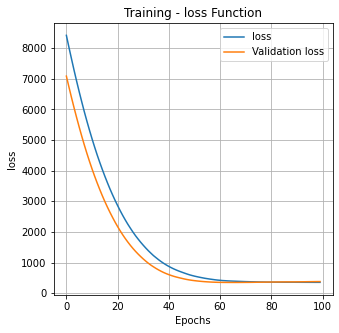

In [37]:
# Graphische Darstellung der Fehler während des Trainings.
def plot_training_curve(history, xlim=None, ylim=None,keys=['loss']):
    for key in keys:
        plt.figure(figsize=(5, 5))
        #plt.subplot(2, 2, 1)
        plt.plot(history.history[key], label=key)
        plt.plot(history.history['val_'+key], label='Validation '+key)
        plt.legend()
        plt.title('Training - '+key+' Function')
        plt.xlabel('Epochs')
        plt.ylabel(key)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
 
plot_training_curve(history)
# Vergößerung (xlim und ylim ev. anpassen!)
# plot_training_curve(history,xlim=(242,594),ylim=(45,135))

In [43]:
# Berechung des MSE mittels der Methode evaluate
mse_train_linear_model_FuncAPI = model.evaluate(X_train, y_train, verbose=0)
mse_test_linear_model_FuncAPI = model.evaluate(X_test, y_test, verbose=0)
print('MSE train:',mse_train_linear_model_FuncAPI)
print('MSE test :',mse_test_linear_model_FuncAPI)

MSE train: 359.1434020996094
MSE test : 276.2067565917969


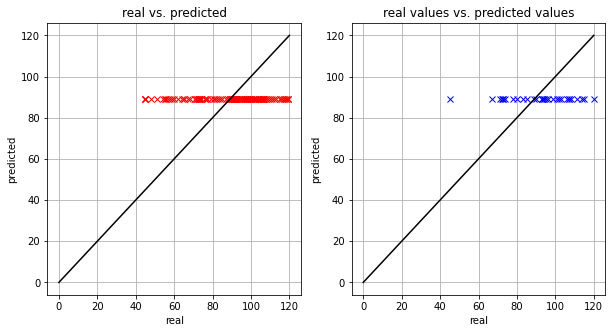

In [44]:
# Darstellung der realen Werte gegen dies geschätzte Werten
def plot_real_vs_predicted(model, Xtrain,y_train,Xtest,y_test):
    y_train_pred = model.predict(X_train)   # Verwendung der Methode predict wird in Funkt. integriert
    y_test_pred = model.predict(X_test)     # Verwendung der Methode predict
    y_max = np.max([y_train.max(),y_train_pred.max(),y_test.max(),y_test_pred.max()])
    # Graphische Darstellung
    # Trainingdaten
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(y_train,y_train_pred,'rx')
    plt.plot([0,y_max],[0,y_max],'k-')
    plt.title('real vs. predicted')
    plt.xlabel('real')
    plt.ylabel('predicted')
    plt.grid()
    # Testdaten
    plt.subplot(1, 2, 2)
    plt.plot(y_test,model.predict(X_test),'bx')
    plt.plot([0,y_max],[0,y_max],'k-')
    plt.title('real values vs. predicted values')
    plt.xlabel('real')
    plt.ylabel('predicted')
    plt.grid()

# plot_real_vs_predicted(linear_model_FuncAPI, X_train,y_train,X_test,y_test)
plot_real_vs_predicted(model, X_train,y_train,X_test,y_test)